<a href="https://colab.research.google.com/github/rubbybbs/ProbML-book-solution/blob/main/ch14/14_7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14.7.4
给定二维空间的高斯分布$p(\mathbf x) = \mathcal N(0, \Sigma)$，其中$\Sigma_{ii}=1$，$\Sigma_{ij}=0.95,~i\neq j$。实现吉布斯采样算法，并画图展示采样过程。

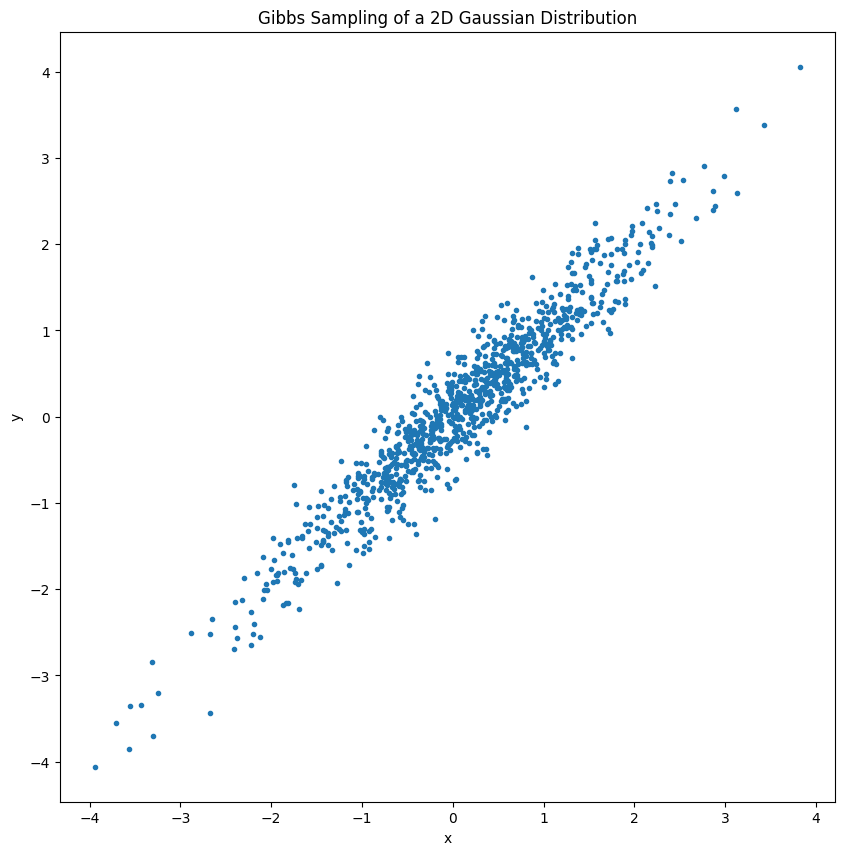

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gibbs_sampling(mu, Sigma, N):
    d = len(mu)
    samples = np.zeros((N, d))
    samples[0, :] = np.zeros_like(mu) # Start from origin

    for i in range(1, N):
        samples[i, :] = samples[i-1, :] # copy previous sample
        for j in range(d):
            # compute parameters of conditional distribution
            # A reuseable value: \Sigma_{ji} \Sigma_{ii}^{-1}
            Sigma_value = np.dot(Sigma[j, np.arange(d)!=j], np.linalg.inv(Sigma[np.arange(d)!=j, :][:, np.arange(d)!=j]))
            mu_j = mu[j] + np.dot(Sigma_value, (samples[i, np.arange(d)!=j] - mu[np.arange(d)!=j]))
            Sigma_jj = Sigma[j, j] - np.dot(Sigma_value, Sigma[np.arange(d)!=j, j])
            # draw a sample from conditional distribution
            samples[i, j] = np.random.normal(mu_j, np.sqrt(Sigma_jj))

    return samples

# parameters of the Gaussian distribution
mu = np.array([0, 0])
Sigma = np.array([[1, 0.95], [0.95, 1]])

# number of samples to draw
N = 1000

# perform Gibbs sampling
samples = gibbs_sampling(mu, Sigma, N)

# plot the samples
plt.figure(figsize=(10, 10))
plt.plot(samples[:, 0], samples[:, 1], '.')
plt.title('Gibbs Sampling of a 2D Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()